In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import time

In [2]:
from audio.signal import *
from audio.const import *
from audio.sound import *
from audio.control import *
from audio.filter import *
from audio.sampler import *

Mostrar ondas copiandolas para que no se altere el frame.

In [3]:

from copy import deepcopy
def showOsc(osc, time, chunks=False):
    _osc = deepcopy(osc)
    signal = np.zeros(0)
    _chunks = int(time*(SRATE+CHUNK)/CHUNK)
    if chunks:
        _chunks = time
    for i in range(_chunks):
        signal = np.concatenate((signal, _osc.next()))
    plt.plot(signal)

In [4]:
'''REPRODUCTOR'''
input = None

def callback(outdata, frames, time, status):
    global input
    # print('entro')
    if input is not None:
        bloque = input.next()
        # convertimos formato (CHUNK,) a (CHUNK,1) para que adecuarlo a sounddevice
        outdata[:] = bloque.reshape(-1, 1)
    else:
        # si no hay datos, reproducimos silencio
        outdata[:] = np.zeros((CHUNK, 1))


# stream de salida con callBack
stream = sd.OutputStream(samplerate=SRATE, channels=2, callback=callback, blocksize=CHUNK)
stream.start()

In [5]:
def play(osc:Signal, add=False):
    global input 
    if add is False or input is None:
        input = osc # sustituye lo que estaba sonando antes
    else:
        input += osc # añade a lo que estaba sonando antes
        
def stop():
    global input 
    input = None
        
def playFor(osc:Signal, secs=5, add=False):
    play(osc)
    time.sleep(secs)
    stop()    
    
def show(osc:Signal, secs=.5):
    plt.plot(osc.next(SRATE*secs))

Para cargar librerias y reproducir sonido

In [6]:
raise Exception("Para de ejecutar!!")

Exception: Para de ejecutar!!

In [ ]:
playFor(Sine(440), 1)

In [ ]:
playFor(Noise(), 1)

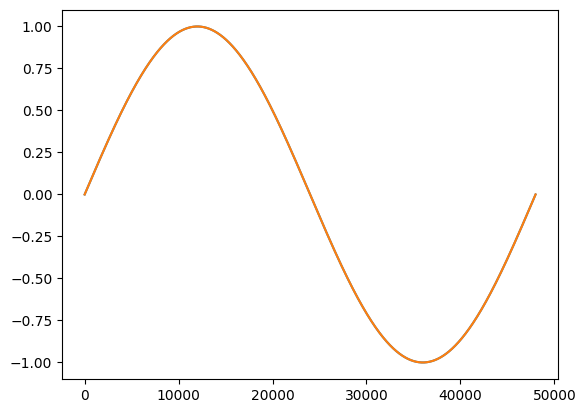

In [ ]:
s = Sine(1).next(SRATE*2)
s2 = Sine(1).next(SRATE*2)
# print(s[0], s[-1])
wt = WT(s[SRATE:], freq=1)
sp = Sampler(s[SRATE:], loop=True)
show(wt, 1)
show(sp, 1)
# playFor(s, 1)
playFor(wt, 2)
playFor(sp, 2)





